###### Bulgaria Employment Trends 
[Go back to the main page](./../Bulgaria_Employment_Trends.ipynb)

---------

## Python Jobs Word Cloud


----------
### Introduction

- Objectives: 
 - Show how searching the offer title is not enough to determine the real demand for python specialists.


### Methodology


https://amueller.github.io/word_cloud/

In [9]:
import random
from collections import Counter
import psycopg2
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

import matplotlib
import matplotlib.pyplot as plt

from nbstyler import STYLE

%matplotlib notebook
%matplotlib inline

In [10]:
conn = psycopg2.connect("dbname=jobsbg")
cur = conn.cursor()
cur.execute('SELECT jobs.name FROM jobs WHERE jobs.id IN (SELECT * FROM mv_job_ids_python_contents);')

result = cur.fetchall()
cur.close()
conn.close()

Prepare a function to color the words.


In [11]:
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#bc005c",
"#e8cdcf",
"#ff215b",
"#947677",
"#c9344d",
"#a36568",
"#fa6a9d",
"#87394a",
"#ff7889",
"#942e40",
"#c16281",
"#a21737"]
    
    return random.choice(colors)


font_path = '/usr/share/fonts/passion-one/PassionOne-Regular.ttf'
# Candidate fonts:
# /usr/share/fonts/TTF/FiraSansCompressed-Medium.ttf
# /usr/share/fonts/fira-sans-condensed/FiraSansCondensed-Black.ttf
# /usr/share/fonts/nerd-fonts-complete/ttf/Iosevka Term Heavy Nerd Font Complete.ttf
# /usr/share/fonts/jockey-one/JockeyOne-Regular.ttf
# /usr/share/fonts/londrina-solid/LondrinaSolid-Regular.ttf
# /usr/share/fonts/luckiest-guy/LuckiestGuy-Regular.ttf
# /usr/share/fonts/nerd-fonts-complete/ttf/Noto Sans Condensed Black Nerd Font Complete.ttf
# /usr/share/fonts/TTF/Oswald-SemiBold.ttf
# /usr/share/fonts/overlock/Overlock-Black.ttf
# /usr/share/fonts/passion-one/PassionOne-Regular.ttf
# /usr/share/fonts/saira-extracondensed/SairaExtraCondensed-SemiBold.ttf



Prepare the mask

What is needed is basically an image with the mask in black on a white background. We can prepare it programatically, or we can use an editor like Inkscape to prepare it. 

The programatical approach can be seen here: https://github.com/minimaxir/stylistic-word-clouds/blob/master/wordcloud_yelp_neg.py 

Since I had the icon needed contained in a font installed on the system, I chose the Inkscape approach:
  - create an empty project and open the document properties menu (`File` > `Document Properties`). 
  - Set the units to `px` and the custom size dimensions to whatever mask size we need (in this case 2048 x 2048 px).
  - In the same menu select a white background (255, 255, 255 ,255) with no transparency.
  - In the glyphs menu (`Text` > `Glyphs`) select the font that contains the icon to use and then find the icon and copy-paste it in the document.
  - Resize and place the icon glyph to the needed position (in this case it is stretched to fully fit in the mask. Remove any stroke from the object and set the fill to black.
  - Export the file as `.png`. The mask is ready to use

In [12]:
icon = Image.open('../resources/python_mask.png')
mask = np.array(icon)

Prepare the stopwords

The `wordcloud` module comes with a set of words to filter out when constructing the word cloud object. Adding additional words to the set will prevent them from appearing in the final word cloud.

In [13]:
stopwords = STOPWORDS
stopwords.add('')

Prepare the text

In [14]:
jobs_text = ' '.join(job_name[0].strip().upper() for job_name in result)

counter = Counter(jobs_text.split())
word_freq_dict = dict(counter)

In [15]:
wc = WordCloud(
    font_path = font_path,
    width = 920,
    height = 600,
    mask = mask,
    contour_width = 20,
    contour_color = STYLE['colors']['solid']['fg1'],
    background_color = STYLE['colors']['solid']['bg1'],
    # colormap = 'viridis',  # Not used when color_func is specified
    color_func = color_func,
    max_words = 2000,
    min_font_size = 10,
    font_step = 1,
    max_font_size = 300, 
    random_state = 42,
    stopwords = stopwords,
    repeat = False,
)

In [16]:
# wc.generate_from_text(jobs_text)
wc.generate_from_frequencies(word_freq_dict)

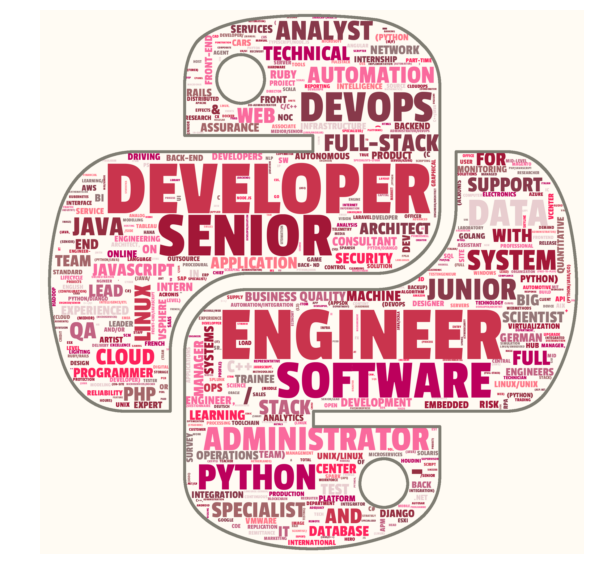

In [17]:
plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
from IPython.core.display import HTML
with open('../resources/styles/python_style.css', 'r') as f:
    style = f.read()
HTML(style)